# Gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

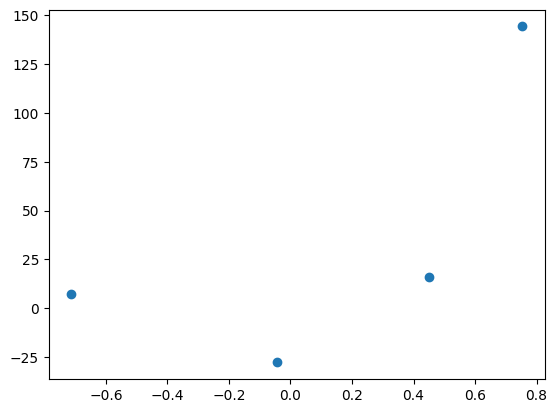

In [4]:
plt.scatter(X,y)

## Batch Gradient descent (for 2 columns)

In [5]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

In [6]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
reg.coef_ # m

array([78.35063668])

In [8]:
reg.intercept_

np.float64(26.15963284313262)

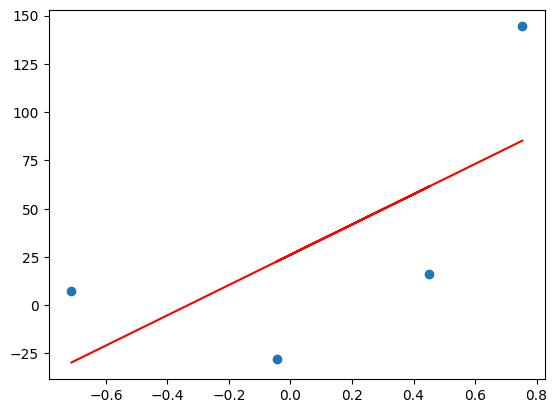

In [9]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [10]:
# let's apply gradient descent assuming slope is comstant ie 78.35
# and let's assume the starting value for intercept b=0
y_pred=((78.35*X)+0).reshape(4)

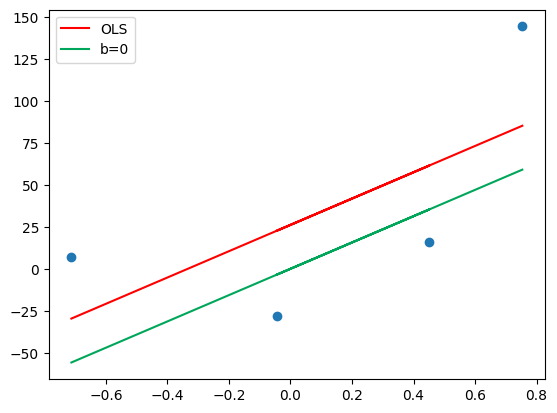

In [11]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.legend()
plt.show()

In [12]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-209.27763408209216)

In [13]:
#step size calculate
lr=0.1 #learning rate
step_size=loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [14]:
#calculating new b
b=b-step_size
b

np.float64(20.927763408209216)

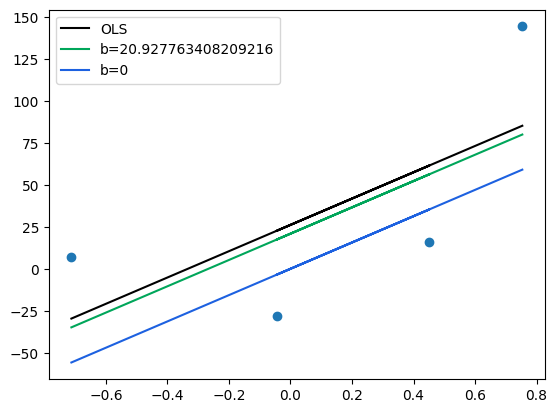

In [15]:
y_pred1=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(X,y_pred,color="#1d61e0",label='b=0')
plt.legend()
plt.show()

In [16]:
# interation 2
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [17]:
step_size=loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [18]:
b=b-step_size
b

np.float64(25.11331608985106)

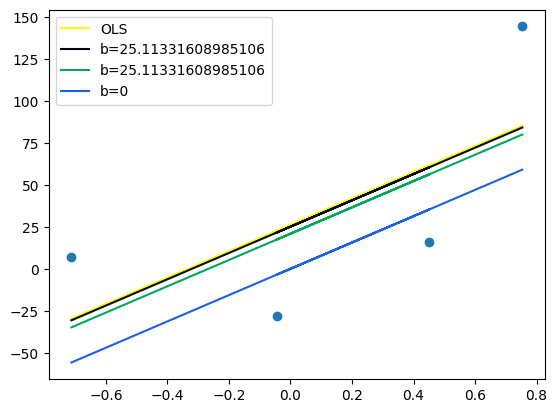

In [19]:
y_pred2=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='yellow',label='OLS')
plt.plot(X,y_pred2,color="#01040e",label='b={}'.format(b))
plt.plot(X,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(X,y_pred,color="#1d61e0",label='b=0')
plt.legend()
plt.show()

-8.371105363283675
-0.8371105363283675
25.95042662617943


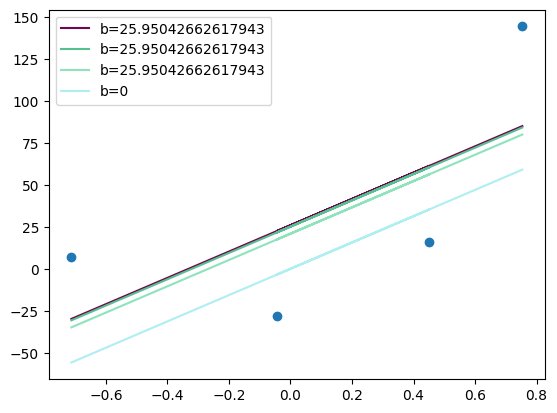

In [20]:
#iteration 3
loss_slope=-2*np.sum(y-m*X.ravel()-b)
print(loss_slope)
step_size=loss_slope*lr
print(step_size)
b=b-step_size
print(b)
y_pred3=((78.35*X)+b).reshape(4)

plt.scatter(X,y)

plt.plot(X,y_pred3,color="#700751",label='b={}'.format(b))
plt.plot(X,y_pred2,color="#58c08f",label='b={}'.format(b))
plt.plot(X,y_pred1,color="#8ee2bc",label='b={}'.format(b))
plt.plot(X,y_pred,color="#afeef1",label='b=0')
plt.legend()
plt.show()

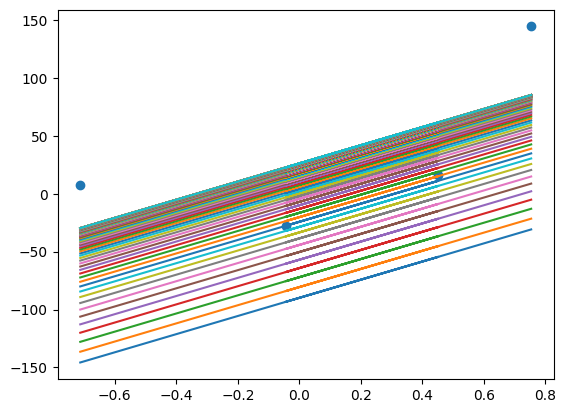

In [21]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

In [22]:
# gradient descent

In [23]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

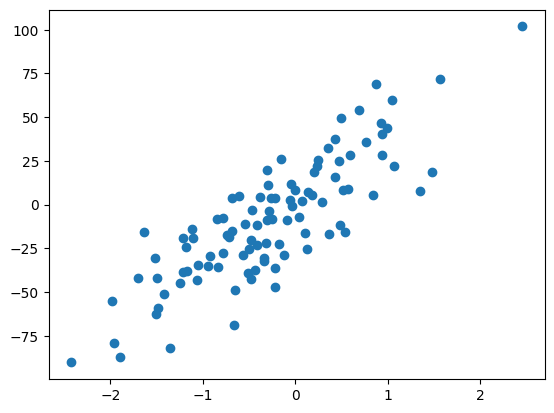

In [24]:
plt.scatter(X,y)

In [25]:
lr1=LinearRegression()

In [26]:
lr1.fit(X,y)
print("Sklearn coefficient(M) : ",lr1.coef_)
i=lr1.intercept_
i

Sklearn coefficient(M) :  [33.8717884]


np.float64(0.4219810672019406)

In [27]:
m=41.37

In [28]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=41.37
        self.b=0
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        #calculate b using GD
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-m*X.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
            print(self.b)

        return self.b
        



In [29]:
gd=GDRegressor(0.005,10)

In [30]:
gd.fit(X,y)

2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034


np.float64(2.4446416740275034)

In [31]:
i

np.float64(0.4219810672019406)

In [32]:
diff=(i-gd.fit(X,y))/i
print("Error :",diff*100,"%")

2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
2.4446416740275034
Error : -479.3249659842229 %


## m and b both are unkonwn

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

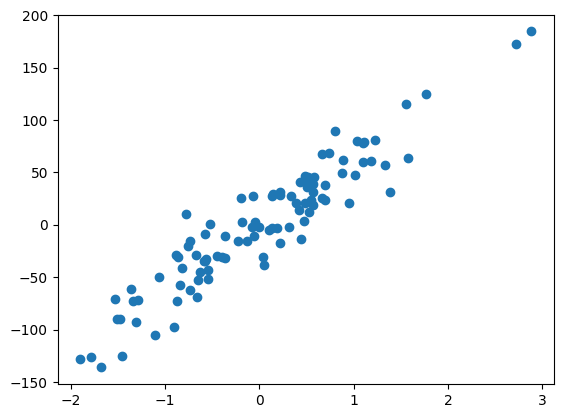

In [35]:
plt.scatter(X,y)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)
print("m =",lr.coef_)
print("b =",lr.intercept_)

m = [62.67961554]
b = -1.5009739069596026


In [39]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8568252530313247

In [40]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.796137639639902)

In [41]:
class GDRegressor1:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        #calculate b using GD
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())

            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.m,self.b)
    def predict(self,X):
            return self.m*X+self.b


In [42]:
gd1=GDRegressor1(0.001,300)

In [43]:
gd1.fit(X_train,y_train)

62.67961554292116 -1.5009739069596029


In [44]:
y_pred=gd1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8568252530313247

Gradient descent 3D

In [45]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [46]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")

## Batch Gradient descent (for multiple columns)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

In [48]:
X,y=load_diabetes(return_X_y=True)

In [49]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
reg=LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
print(reg.coef_) # one for each cols
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [53]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [54]:
X_train.shape

(353, 10)

create on class

In [55]:
class GDRegression:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coeff and intercept
            y_hat=np.dot(X_train,self.coef_)+self.intercept_
           # print("Shape of y_hat",y_hat)
            intercept_der=-2*np.mean(y_train-y_hat)
            self.intercept_=self.intercept_-(self.lr*intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)
    def predict(self,X_test):
            return np.dot(X_test,self.coef_) + self.intercept_

In [56]:
gdr=GDRegression(epochs=1000,learning_rate=0.5)

In [87]:
import time
start=time.time()
gdr.fit(X_train,y_train)
print("Time taken is ",time.time()-start)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]
Time taken is  0.19458556175231934


In [58]:
y_pred=gdr.predict(X_test)

In [59]:
r2_score(y_test,y_pred)

0.4534503034722803

# Stochastic GD

In [60]:
X,y=load_diabetes(return_X_y=True)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
reg=LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [64]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [85]:
import random
import time

In [79]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [80]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [86]:
start=time.time()
sgd.fit(X_train,y_train)
print("Time taken is ",time.time()-start)

143.0249296754064 [  58.32407795  -40.11608612  309.08706783  227.21534265   30.34238073
  -10.23906478 -160.33668156  130.90868138  292.42620947  126.98379092]
Time taken is  0.4169008731842041


In [83]:
y_pred = sgd.predict(X_test)

In [84]:
r2_score(y_test,y_pred)

0.4149452236764153

In [70]:
coef_=np.ones(X_train.shape[1])

In [71]:
intercept_=0

In [72]:
np.dot(X_test[42],coef_)+intercept_

np.float64(0.15275305433528444)

from sklearn class

In [88]:
from sklearn.linear_model import SGDRegressor

In [89]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [92]:
reg.fit(X_train,y_train)

c:\Users\Admin\Desktop\Arusa\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [93]:

y_pred = reg.predict(X_test)

In [94]:
r2_score(y_test,y_pred)

0.43276935455090904